## Setup: Import libraries for sentiment and thematic analysis

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import emoji
import sys
import os
sys.path.append(os.path.abspath('..'))
from scripts.task2_helper_functions import SentimentAnalysis, ThematicAnalysis, clean_text, handle_missing_values

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sentiment_analysis = SentimentAnalysis()
thematic_analysis = ThematicAnalysis()

In [32]:
nlp = spacy.load("en_core_web_sm")
nltk.download('vader_lexicon') # Download the VADER lexicon 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
sid = SentimentIntensityAnalyzer()

## Load cleaned banks datasets

In [3]:
df_boa = pd.read_csv('../data/boa_cleaned.csv', parse_dates=['date'])
df_cbe = pd.read_csv('../data/cbe_cleaned.csv', parse_dates=['date'])
df_dashen = pd.read_csv('../data/dashen_cleaned.csv', parse_dates=['date'])
df = pd.concat([df_boa, df_cbe, df_dashen])
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1200 non-null   int64         
 1   review  1200 non-null   object        
 2   rating  1200 non-null   int64         
 3   source  1200 non-null   object        
 4   date    1200 non-null   datetime64[ns]
 5   bank    1200 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 56.4+ KB


## 1- Sentiment Analysis

In [ ]:
df['cleaned_review'] = df['review'].apply(clean_text) # cleaning text to send furhter the pipeline


In [5]:
df[['sentiment_label', 'sentiment_score']] = df['review'].apply(lambda x: pd.Series(sentiment_analysis.get_sentiment(x)))

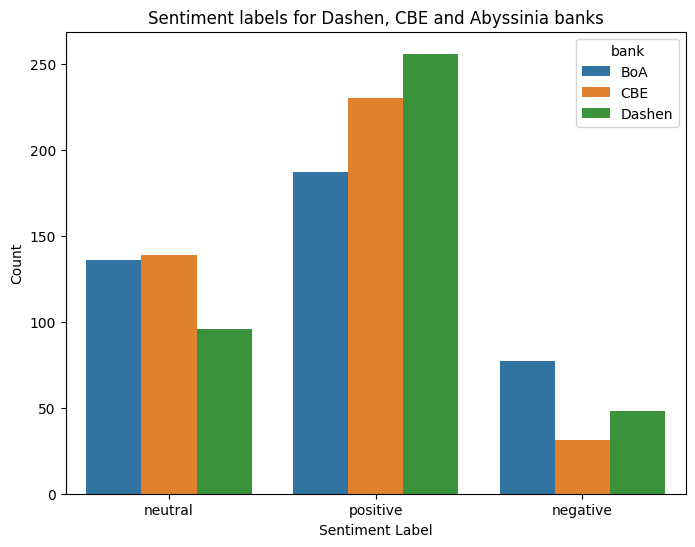

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='sentiment_label', hue='bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment labels for Dashen, CBE and Abyssinia banks')
plt.show()

In [8]:
# Create a new column with cleaned text
df['cleaned_review'] = df['review'].apply(sentiment_analysis.preprocess_text)

In [9]:
df[['review', 'cleaned_review']].head(30) ## comparing review and cleaned_review after transformation


,review,cleaned_review
0,🙏👍,
1,Very Good,good
2,goof,goof
3,good!,good
4,good jop,good jop
5,bad exprience...it is so crushed,bad exprience crushed
6,not user friendly at all it requires a huge co...,user friendly require huge connectivity lag time
7,ምንም የማይ ሰራ,ምንም የማይ ሰራ
8,very good,good
9,most of the time is not working properly,time work properly


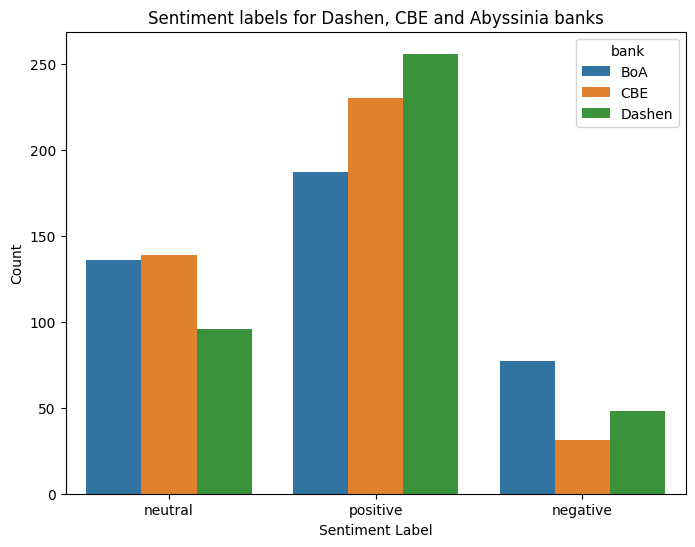

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='sentiment_label', hue='bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment labels for Dashen, CBE and Abyssinia banks')
plt.show()

In [11]:
df.to_csv('../data/cleaned_data.csv')

## 2- Thematic Analysis on the dataset

In [12]:
df['cleaned_review'] = df['cleaned_review'].apply(handle_missing_values)

In [13]:
keywords = thematic_analysis.extract_keywords(df['cleaned_review'])
df['identified_theme'] = thematic_analysis.assign_theme(keywords)

print(df[['cleaned_review', 'identified_theme']])

                                   cleaned_review identified_theme
0                                                          General
1                                            good          General
2                                            goof          General
3                                            good          General
4                                        good jop          General
...                                           ...              ...
1195                                         good          General
1196  amazing app super easy use good design love               ui
1197                                         good          General
1198                                         nice          General
1199                   excellent game changer app          General

[1200 rows x 2 columns]


In [14]:
df.head()

,index,review,rating,source,date,bank,cleaned_review,sentiment_label,sentiment_score,identified_theme
0,0,🙏👍,5,Google Play,2025-11-29,BoA,,neutral,0.0000,General
1,1,Very Good,5,Google Play,2025-11-28,BoA,good,positive,0.4927,General
2,2,goof,5,Google Play,2025-11-28,BoA,goof,neutral,0.0000,General
3,3,good!,5,Google Play,2025-11-28,BoA,good,positive,0.4926,General
4,4,good jop,5,Google Play,2025-11-27,BoA,good jop,positive,0.4404,General


In [15]:
# Step 3: Export the DataFrame with the theme labels to a new CSV file
df.to_csv('../data/cleaned_themed_reviews.csv', index=False)

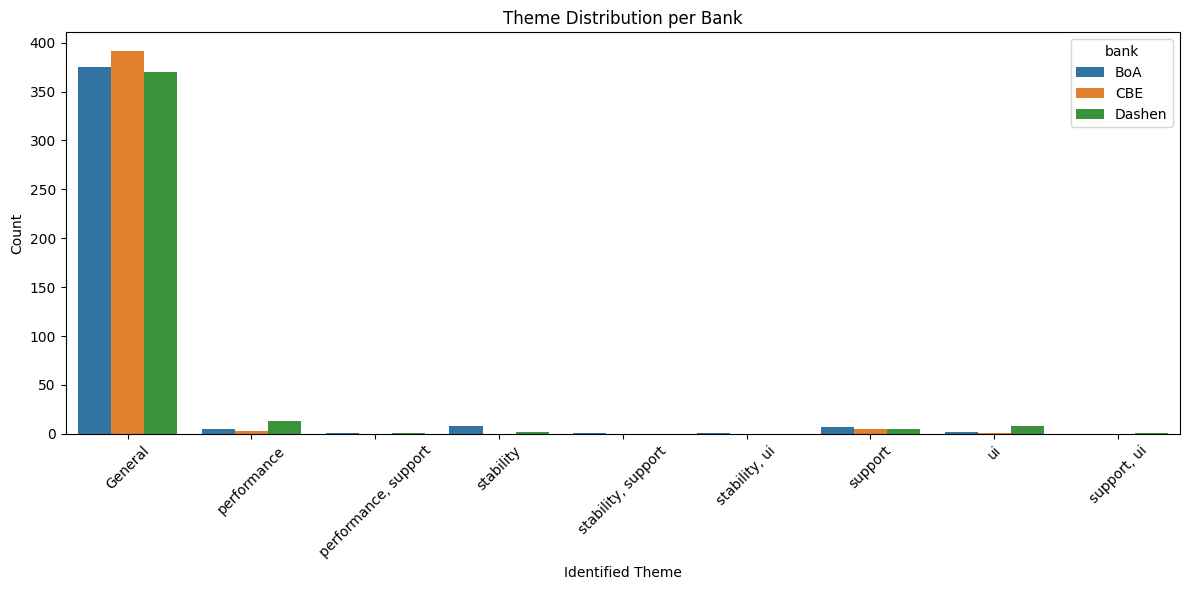

In [16]:
theme_counts = df.groupby(['bank', 'identified_theme']).size().reset_index(name='counts')

# Visualize with a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=theme_counts, x='identified_theme', y='counts', hue='bank')
plt.title("Theme Distribution per Bank")
plt.xlabel("Identified Theme")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()